# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# Set the significance level that will be used throughout the exercise.
alpha = 0.05

# Extract the temperature column.
temperature = df['temperature']


In [3]:
# Draw a normal sample using the same mean and standard deviation as parameters for comparison.
np.random.seed(100)
normal_sample = np.random.normal(np.mean(temperature), np.std(temperature), len(temperature))

### 1. Is the distribution of body temperatures normal?

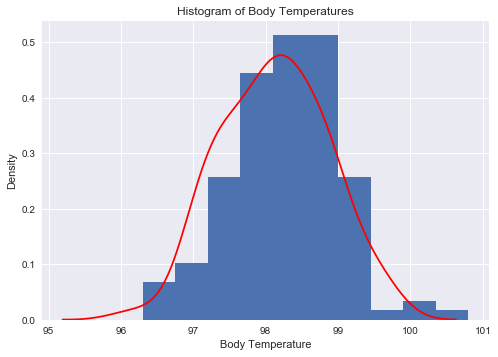

In [4]:
# Histogram of temperature values
plt.hist(temperature, normed=True)

# Density for normal sample.
sns.distplot(normal_sample, hist=False, color='red')

plt.xlabel('Body Temperature')
plt.ylabel('Density')
plt.title('Histogram of Body Temperatures')

plt.show()

The histogram shows data that appears close to normal, but the tails appear uneven.  Let's examine the ECDF.

In [5]:
# Define a function that computes the ECDF for a one-dimensional array.
def ecdf(data):
    size = len(data)
    x = np.sort(data)
    y = np.arange(1, size+1) / size
    return x, y

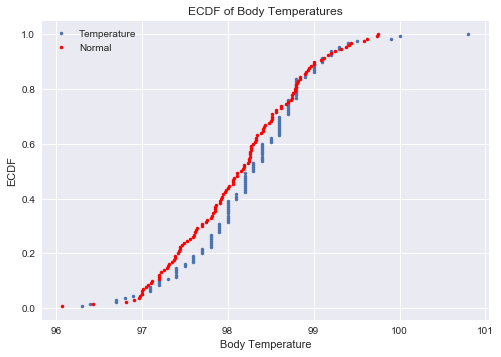

In [6]:
# Calculate the ECDFs for both the temperature observations and the normal sample
x_temp, y_temp = ecdf(temperature)
x_norm, y_norm = ecdf(normal_sample)

plt.plot(x_temp, y_temp, marker='.', linestyle='none', label='Temperature')
plt.plot(x_norm, y_norm, marker='.', linestyle='none', label='Normal', color='red')
plt.xlabel('Body Temperature')
plt.ylabel('ECDF')
plt.title('ECDF of Body Temperatures')
plt.legend()
plt.show()

The ECDFs have similar trends but are not exact.  For further investigation, a numerical test will be performed.

In [7]:
# Perform a numerical test to check for normality.  The function used tests the null hypothesis that a sample comes from a normal distribution.

stat, p = stats.normaltest(temperature)

print(f'p-value: {p:.2f}; alpha: {alpha}')

p-value: 0.26; alpha: 0.05


Since the p-value of the normality test is not less than alpha, there is not enough evidence to conclude that the distribution of body temperatures is not normal.

### 2\. Is the sample size large? Are the observations independent?

In [8]:
len(temperature)

130

The sample size is greater than 30 and therefore meets the threshold to use the Central Limit Theorem.  The sample size is also well within the 10% of the population rule and so the observations can be considered independent.

### 3\. Is the true population mean really 98.6 degrees F?

In [9]:
# Calculate the observed mean.
sample_mean = np.mean(temperature)
sample_mean

98.24923076923078

In [10]:
# Generate 10,000 bootstrap replicates of the mean
np.random.seed(99)
size = 10000
bootstrap_means = np.empty(size)

for i in range(size):
    bootstrap_sample = np.random.choice(temperature, size=len(temperature), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

To test the hypothesis that the mean is 98.6, we will calculate the proportion of values that are greater than 98.6.  Under this hypothesis, we would expect that this proportion would be around 50%.

In [11]:
p_value = np.sum(bootstrap_means >= 98.6) / 10000
print(f'p-value: {p_value:.2f}; alpha: {alpha}')

p-value: 0.00; alpha: 0.05


Based on this result, we can reject the null hypothesis and conclude that there is enough evidence to suggest that the mean differs from 98.6.

Frequentist testing:

Since we are comparing the mean to a single, predetermined value, a one-sample test will be used.  The population standard deviation is unknown however the sample size is reasonably large (> 30) so we should be able to use a z-test using the sample standard deviation as an estimate.

In [12]:
# Perform two-sided z-test for sample.
from statsmodels.stats.weightstats import ztest

z_statistic, p_value_z = ztest(temperature, value=98.6, alternative='two-sided')
print(f'z-statistic: {z_statistic:.2f}; p-value: {p_value_z:.2f}; alpha: {alpha}')

z-statistic: -5.45; p-value: 0.00; alpha: 0.05


The p-value is below our level of signficance and we can reject the null hypothesis that the mean is equal to 98.6

In [13]:
# Perform two-sided t-test for sample.
t_statistic, p_value_t = stats.ttest_1samp(temperature, 98.6)
print(f't-statistic: {t_statistic:.2f}; p-value: {p_value_t:.2f}; alpha: {alpha}')

t-statistic: -5.45; p-value: 0.00; alpha: 0.05


Onca again, the p-value is below our level of signficance and we can reject the null hypothesis that the mean is equal to 98.6.

In [14]:
ratio = p_value_t/p_value_z
print(ratio)

4.91749251324


While both test produce p-values below the level of signifance and produce the same result, we see that the p-value for the t-test is almost five times as large as that for the z-test.  This is because the t distribution has thicker tails compared to the normal distribution and therefore, extreme values are more likely.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [15]:
# Draw a sample of size 10.
np.random.seed(100)
temp_sample_10 = np.random.choice(temperature, size=10)

In [16]:
# Perform two-sided t-test for sample of size 10.
t_statistic_10, p_value_t_10 = stats.ttest_1samp(temp_sample_10, 98.6)
print(f't-statistic: {t_statistic_10:.2f}; p-value: {p_value_t_10:.2f}; alpha: {alpha}')

t-statistic: -1.82; p-value: 0.10; alpha: 0.05


The p-value is above the level of significance and therefore there is not enough evidence to reject the null hypothesis that the mean is 98.6.

In [17]:
# Perform two-sided z-test for sample of size 10.
z_statistic_10, p_value_z_10 = ztest(temp_sample_10, value=98.6, alternative='two-sided')
print(f'z-statistic: {z_statistic_10:.2f}; p-value: {p_value_z_10:.2f}; alpha: {alpha}')

z-statistic: -1.82; p-value: 0.07; alpha: 0.05


Once again, the p-value is above the level of significance and therefore there is not enough evidence to reject the null hypothesis that the mean is 98.6.

This time, our sample size is small (<30) with an unknown standard deviation and so the t-test is more appropriate.  In application, the p-value is highler using the t-test due to the thicker tails of the t distribution which makes it more unlikely to reject the null hypothesis.

## 5\. At what temperature should we consider someone's temperature to be "abnormal"?

Bootstrap:

In [18]:
# Calculate a 95% confidence interval using the bootstrap samples.
bootstrap_ci = np.percentile(bootstrap_means, [2.5, 97.5])
print(f'A 95% confidence interval for mean temperature is ({bootstrap_ci[0]:.2f}, {bootstrap_ci[1]:.2f})')

A 95% confidence interval for mean temperature is (98.12, 98.38)


Frequentist:

In [19]:
# Calculate a 95% confidence interval using the frequentist approach.
z = stats.norm.ppf(.975)
margin_of_error = z * np.std(temperature) / np.sqrt(len(temperature))
ci_upper = np.mean(temperature) + margin_of_error
ci_lower = np.mean(temperature) - margin_of_error
print(f'A 95% confidence interval for mean temperature is ({ci_lower:.2f}, {ci_upper:.2f})')

A 95% confidence interval for mean temperature is (98.12, 98.37)


The confidence intervals from the two approaches are very similar.  We can use these results to say that an "abnormal" body temperature would be less than 98.12 or more than 98.38.

## 6\. Is there a significant difference between males and females in normal temperature?

In [20]:
# Explore values for gender.
df.gender.value_counts()

M    65
F    65
Name: gender, dtype: int64

In [21]:
# All values for gender are either 'M' of 'F' so we can split the temperature column on those values.
temperature_male = df[df['gender'] == 'M']['temperature']
temperature_female = df[df['gender'] == 'F']['temperature']

In [22]:
# Examine mean values for each gender.
print(f'Male mean body temperature: {np.mean(temperature_male):.2f} degrees')
print(f'Female mean body temperature: {np.mean(temperature_female):.2f} degrees')

Male mean body temperature: 98.10 degrees
Female mean body temperature: 98.39 degrees


Since we are comparing two sample means, the appropriate test would be the two-sample t-test.

In [23]:
# Perform the two-sample t-test first assuming equal population variances and then without that assumption.
t_stat_mf, p_value_mf = stats.ttest_ind(temperature_male, temperature_female, equal_var=True)
t_stat_mf_2, p_value_mf_2 = stats.ttest_ind(temperature_male, temperature_female, equal_var=False)

In [24]:
print(f'Equal variance assumption: t-statistic: {t_stat_mf:.2f}, p-value: {p_value_mf:.2f}, alpha: {alpha}')
print(f'No equal variance assumption: t-statistic: {t_stat_mf_2:.2f}, p-value: {p_value_mf_2:.2f}, alpha: {alpha}')

Equal variance assumption: t-statistic: -2.29, p-value: 0.02, alpha: 0.05
No equal variance assumption: t-statistic: -2.29, p-value: 0.02, alpha: 0.05


In both cases, the test yield similar results.  The p-value is below the level of significance and we can reject the hypothesis that the population means of male body temperature and female body temperature are equal.

## Conclusion

The analysis above shows that there is sufficient evidence to suggest that the mean body temperature of a human is lower than the established 98.6 degrees.  In fact, based on the observed data, 98.6 degrees would be considered to be an "abnormal" value.  There is also evidence that suggests there is a difference in body temperature between gender.

Further study and investigation would be required as the sample size is relatively small in comparison to the population at large.  It is also unclear whether the data was drawn from a representative population.  For example, did all of the subjects live in the same geographic area?  Were accurate measurement techniques used and were the measurements taken in a consistent, controlled environment?